In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Modelling a transient plug flow reactor

- Transient state
$\frac{∂C_A}{∂t}=−ν_0\frac{∂C_A}{∂V}+r_A$


- Steady state\n$\frac{∂C_A}{∂V}=\frac{r_A}{v_0}$

where\
$r_A = -kC_A^2$

In [2]:
N = 100     # number of points to discretize

# spatial discretization
V = 20 # total volume of reactor
Vspan = np.linspace(0, V, N) # discretized volume elements
dV = V/(N-1)

# temporal discretization
tfinal = 25
tspan = np.linspace(0, tfinal, N)

def transient(t, C, k, v0): 
    
    dCdt = np.ones(N)
    dCdt[:-1] = 0
    
    for i in range(1, N-1):
        
        dCdt[1:] = - v0*(C[1:] - C[:-1])/dV - k*(C[1:]**2)        
    
    return dCdt

# initial values
C_A0 = 2
C_init = np.zeros(N)    # Concentration in reactor at t = 0
C_init[0] = C_A0        # concentration at entrance of A: C_A0

# arguments
v0 = 2      # volumetric flow rate
k = 1       # reaction rate constant
args = (k, v0)

sol_transient = solve_ivp(transient, (0, tspan[-1]), C_init, t_eval = tspan, args = args)

sol_transient

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 980
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.25252525,  0.50505051,  0.75757576,  1.01010101,
        1.26262626,  1.51515152,  1.76767677,  2.02020202,  2.27272727,
        2.52525253,  2.77777778,  3.03030303,  3.28282828,  3.53535354,
        3.78787879,  4.04040404,  4.29292929,  4.54545455,  4.7979798 ,
        5.05050505,  5.3030303 ,  5.55555556,  5.80808081,  6.06060606,
        6.31313131,  6.56565657,  6.81818182,  7.07070707,  7.32323232,
        7.57575758,  7.82828283,  8.08080808,  8.33333333,  8.58585859,
        8.83838384,  9.09090909,  9.34343434,  9.5959596 ,  9.84848485,
       10.1010101 , 10.35353535, 10.60606061, 10.85858586, 11.11111111,
       11.36363636, 11.61616162, 11.86868687, 12.12121212, 12.37373737,
       12.62626263, 12.87878788, 13.13131313, 13.38383838, 13.63636364,
       13.88888889, 14.141414

In [10]:
pd.DataFrame(sol_transient.y).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,0.0,1.638673,1.703609,1.705925,1.706002,1.706003,1.706012,1.706012,1.706012,1.706012,...,1.706012,1.706012,1.706012,1.706012,1.706012,1.706012,1.706012,1.706012,1.706012,1.706012
2,0.0,1.225570,1.467235,1.482787,1.483609,1.483682,1.483663,1.483663,1.483663,1.483663,...,1.483663,1.483663,1.483663,1.483663,1.483663,1.483663,1.483663,1.483663,1.483663,1.483663
3,0.0,0.791748,1.251819,1.305901,1.309916,1.310120,1.310246,1.310253,1.310253,1.310253,...,1.310253,1.310253,1.310253,1.310253,1.310253,1.310253,1.310253,1.310253,1.310253,1.310253
4,0.0,0.431995,1.030295,1.156326,1.170289,1.171669,1.171594,1.171600,1.171601,1.171601,...,1.171601,1.171601,1.171601,1.171601,1.171601,1.171601,1.171601,1.171601,1.171601,1.171601


### Observations

The transient solution contains the time dependent behavior of each node in the discretized reactor. Each row contains the concentration as a function of volume at a specific time point. For example, we can plot the concentration of A at the exit vs. time

Text(0, 0.5, '$C_A$ at exit')

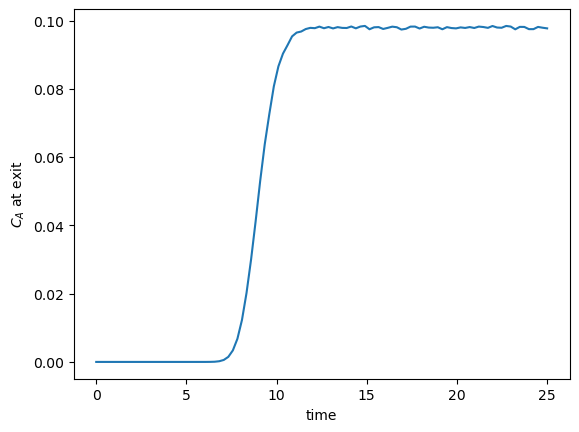

In [14]:
fig, ax = plt.subplots()

ax.plot(sol_transient.t, sol_transient.y[-1])
ax.set_xlabel('time')
ax.set_ylabel('$C_A$ at exit')

In [3]:
# steady state
def steady_state(V, C, k, v0):
    
    return -k * C**2 / v0

sol_steady_state = solve_ivp(steady_state, (0, Vspan[-1]), [C_A0], t_eval = Vspan, args = args)

sol_steady_state

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.3131313

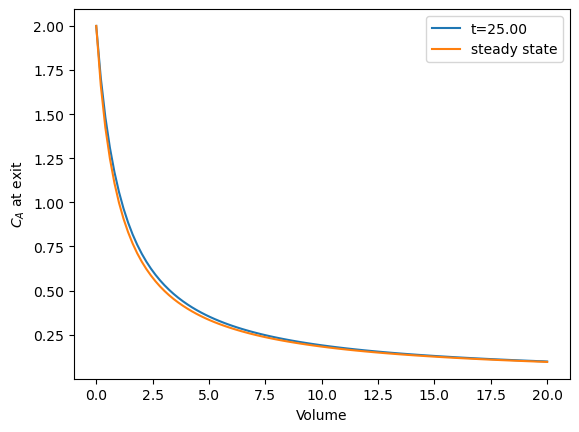

In [4]:
fig, ax = plt.subplots()

ax.plot(sol_steady_state.t, sol_transient.y[:, -1], label = 't={0:1.2f}'.format(tspan[-1]))
ax.plot(sol_steady_state.t, sol_steady_state.y[0], label = "steady state")

ax.set_xlabel('Volume')
ax.set_ylabel('$C_A$ at exit')
ax.legend()

### Observations

After approximately one space time, the steady state solution is reached at the exit. For completeness, we also examine the steady state solution.